Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Загрузка данных

In [2]:
data = pd.read_csv('C:/Users/Nastya/Desktop/data_analyse/DATA-ANALYSYS_2-master/Dataset/ORGANICS.csv', encoding="cp1251")

Обработка пропущенных значений - замена их на среднее

In [3]:
data = data.fillna(data.mean())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22223 entries, 0 to 22222
Data columns (total 13 columns):
ID                 22223 non-null int64
DemAffl            22223 non-null float64
DemAge             22223 non-null float64
DemCluster         22223 non-null float64
DemClusterGroup    21549 non-null object
DemGender          19711 non-null object
DemReg             21758 non-null object
DemTVReg           21758 non-null object
PromClass          22223 non-null object
PromSpend          22223 non-null float64
PromTime           22223 non-null float64
TargetBuy          22223 non-null int64
TargetAmt          22223 non-null int64
dtypes: float64(5), int64(3), object(5)
memory usage: 2.2+ MB


Выбор колонок с числовым типом данных

In [4]:
x=data[['DemAffl',  'DemAge', 'DemCluster', 'PromSpend', 'PromTime']]
y=data.values[::,11].astype('float64')

Создание массива количества деревьев

In [5]:
trees_grid = [i for i in range(1, 302, 10)]

Разделение на test и train

In [6]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

Обучение леса на тренировочном датасете 

In [7]:
temp_test_acc = pd.DataFrame(columns=['ntree', 'score'])
for ntrees in trees_grid:
    rfc = RandomForestClassifier(n_estimators=ntrees, random_state=42, n_jobs=-1, oob_score=True)
    rfc.fit(X_train, y_train)
    rfc.score(X_test, y_test)
    temp_test_acc = temp_test_acc.append({'ntree': ntrees, 'score': rfc.score(X_test, y_test)}, ignore_index=True)

In [8]:
temp_test_acc

,ntree,score
0,1.0,0.717414
1,11.0,0.778311
2,21.0,0.781161
3,31.0,0.783711
4,41.0,0.785361
5,51.0,0.784461
6,61.0,0.783711
7,71.0,0.785511
8,81.0,0.786261
9,91.0,0.786111


Построение графика

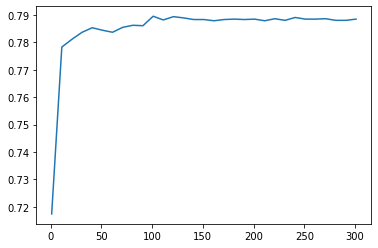

In [9]:
plt.plot(temp_test_acc['ntree'], temp_test_acc['score'])

Начиная с 101 дерева точность практически не меняется и придерживается уровня 0,79.Можно сделать вывод, что оптимальное количество деревьев 101

График зависимости тестовой ошибки от параметра - max_depth

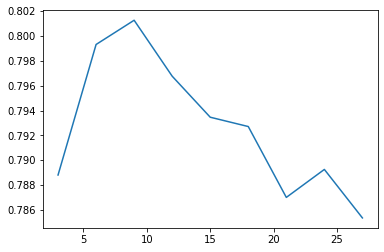

In [10]:
max_depth_grid = [i for i in range(3, 30, 3)]

temp_test_acc = pd.DataFrame(columns=['depth', 'score'])
for max_depth in max_depth_grid:
    rfc = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, oob_score=True, max_depth=max_depth)
    rfc.fit(X_train, y_train)
    rfc.score(X_test, y_test)
    temp_test_acc = temp_test_acc.append({'depth': max_depth, 'score': rfc.score(X_test, y_test)}, ignore_index=True)
    
plt.plot(temp_test_acc['depth'], temp_test_acc['score'])

In [11]:
temp_test_acc

,depth,score
0,3.0,0.788811
1,6.0,0.799310
2,9.0,0.801260
3,12.0,0.796760
4,15.0,0.793460
5,18.0,0.792710
6,21.0,0.787011
7,24.0,0.789261
8,27.0,0.785361


При глубине от 6 до 8 наибольшая точность, с увеличением глубины точность уменьшается

График зависимости тестовой ошибки от параметра - min_samples_split 

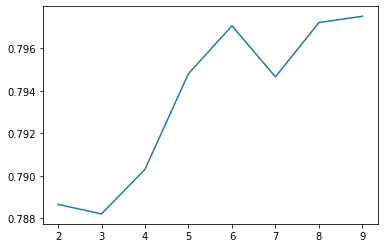

In [12]:
min_samples_split_grid = [i for i in range(2, 10, 1)]

temp_test_acc = pd.DataFrame(columns=['samples_split', 'score'])
for min_samples_split in min_samples_split_grid:
    rfc = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, oob_score=True, min_samples_split=min_samples_split)
    rfc.fit(X_train, y_train)
    rfc.score(X_test, y_test)
    temp_test_acc = temp_test_acc.append({'samples_split': min_samples_split, 'score': rfc.score(X_test, y_test)}, ignore_index=True)
    
plt.plot(temp_test_acc['samples_split'], temp_test_acc['score'])

При количестве разбиений = 9 достигается наибольшая точность

Применим полученные результаты 

In [13]:
rfc = RandomForestClassifier(n_estimators=101, random_state=42, n_jobs=-1, oob_score=True, min_samples_split=9, max_depth = 7)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.79946002699865